In [101]:
# Find Ketel Marte player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_batter
import pandas as pd
import numpy as np

playerid_lookup('marte', 'ketel')
marte_stats = statcast_batter('2025-03-27','2025-09-27', 606466)
#print(marte_stats.columns)

In [102]:
#x = marte_stats.groupby(by="events").count()
game_events = {}
on_base_count = {}
for index, row in marte_stats.iterrows():
    date = row['game_date']
    event = row['events']

    if date not in game_events:
        game_events[date] = []
    if pd.notna(event): 
        game_events[date].append(event)

#print(game_events)

for date, events in game_events.items():
    counter = 0
    if 'single' in events:
        counter += events.count('single')
    if 'double' in events:
        counter += events.count('double')
    if 'triple' in events:
        counter += events.count('triple')
    if 'walk' in events:
        counter += events.count('walk')
    if 'home_run' in events:
        counter += events.count('home_run')
    on_base_count[date] = counter
y_axis = np.array(list(on_base_count.values()))
x_axis = np.array(list(on_base_count.keys()))



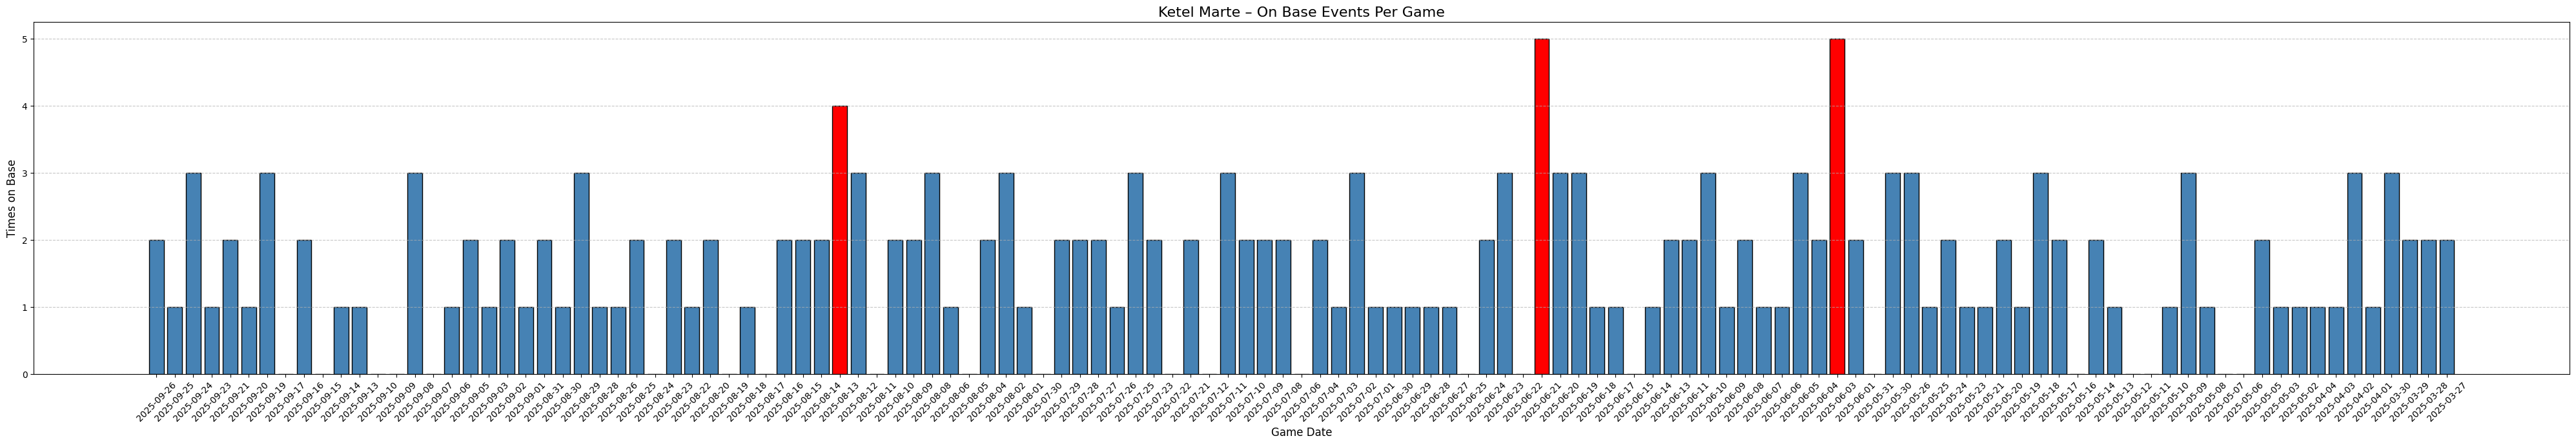

In [103]:
colors = ['red' if y > 3 else 'steelblue' for y in y_axis]

plt.figure(figsize=(40, 7))
plt.bar(x_axis, y_axis, color=colors, edgecolor='black')
plt.title("Ketel Marte – On Base Events Per Game", fontsize=16)
plt.xlabel("Game Date", fontsize=12)
plt.ylabel("Times on Base", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


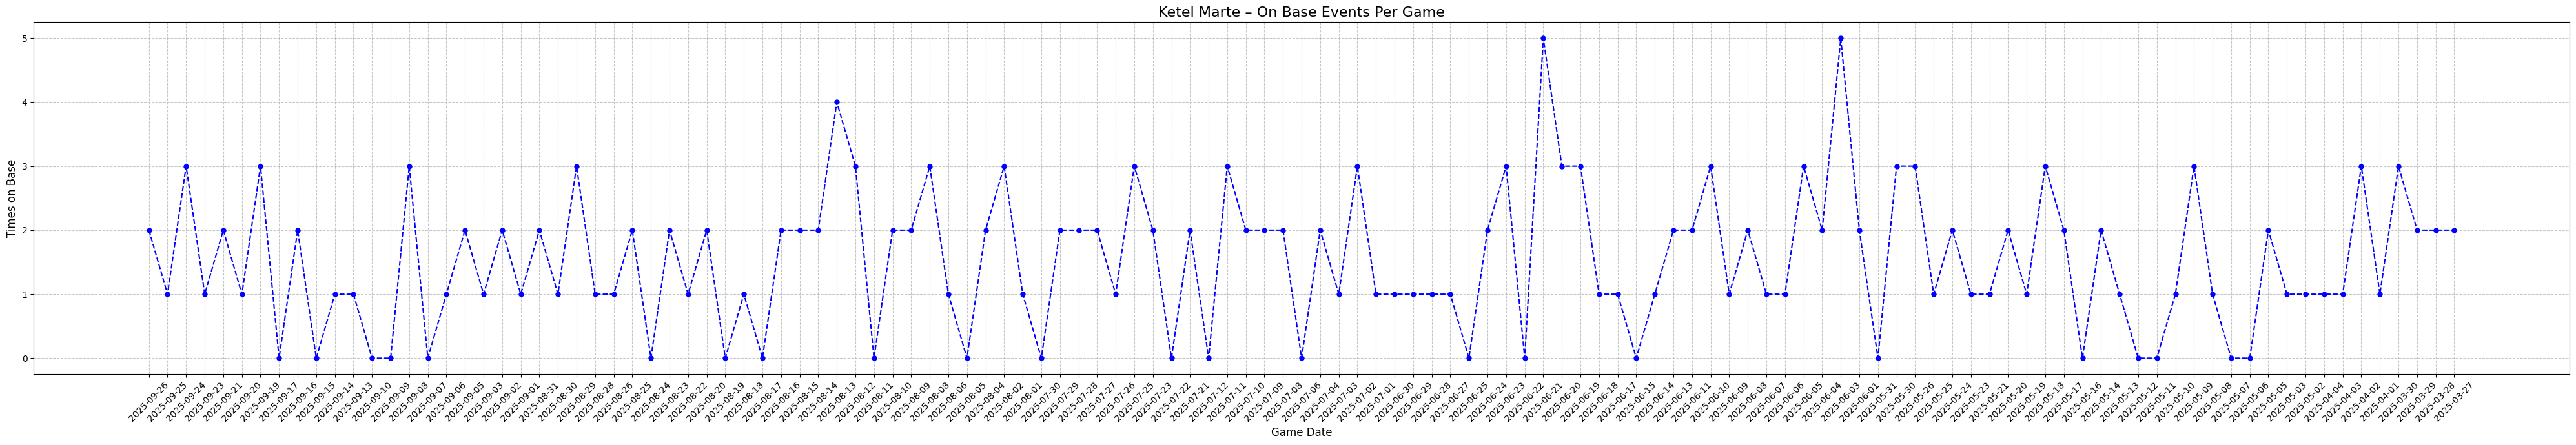

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 7))
plt.plot(x_axis, y_axis, color='blue', linestyle='--', marker='o', markersize=5)
plt.title("Ketel Marte – On Base Events Per Game", fontsize=16)
plt.xlabel("Game Date", fontsize=12)
plt.ylabel("Times on Base", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

